<a href="https://colab.research.google.com/github/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/blob/main/Klasifikasi_Aspek_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir CSV
!wget -P CSV/ https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/CSV/PREPROSS.csv

mkdir: cannot create directory ‘CSV’: File exists
--2021-08-13 16:26:47--  https://raw.githubusercontent.com/ristacp10/Analisis-Sentimen-Berbasis-Aspek-Pada-Aplikasi-Soco-Menggunakan-Bidirectional-Long-Short-Term-Memory/main/CSV/PREPROSS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333914 (326K) [text/plain]
Saving to: ‘CSV/PREPROSS.csv.1’

PREPROSS.csv.1      100%[===================>] 326.09K  --.-KB/s    in 0.02s   

2021-08-13 16:26:47 (13.9 MB/s) - ‘CSV/PREPROSS.csv.1’ saved [333914/333914]



In [3]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import sklearn.metrics as metric
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
names = ['At','Sentimen', 'Review', 'Bintang', 'Aspek', 'data_cleaned_aspek']
file = 'CSV/PREPROSS.csv'
 
try:
  data = pd.read_csv(file)
except:
  data = pd.read_csv(file, names=names).values

dataset = pd.DataFrame()
dataset = pd.DataFrame()
dataset['data_cleaned_aspek'] = data['data_cleaned_aspek'].tolist()
dataset['Aspek'] = data['Aspek'].tolist()
dataset.head()

,data_cleaned_aspek,Aspek
0,good,Lainnya
1,belanja original bayar diskon responsif metode...,Layanan
2,kecewa cancel kosong proses uang sulit check o...,Layanan
3,parah proses refund masuk kerja uang 775 43...,Layanan
4,product tanggal 11 september udah 16 oktob...,Layanan


## SVM

In [5]:
tfidf_vectorizer = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True, 
                                   ngram_range=(1, 1), max_df=0.5, min_df=2)

In [6]:
seed = 99
X = dataset['data_cleaned_aspek'].values.astype('U')
y = dataset['Aspek'].values.astype('U')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

print(X_train.shape, X_test.shape)

(1658, 661) (415, 661)


In [7]:
def hapusKosong(X,y):
    y = y[X.getnnz(1)>0] # delete label dokumen yang memiliki row =0 di tfidf-nya
    X = X[X.getnnz(1)>0] # Remove Zero Rows
    return X, y

X_train, y_train = hapusKosong(X_train, y_train)
X_test, y_test = hapusKosong(X_test, y_test)
print(X_train.shape, X_test.shape)

(1642, 661) (407, 661)


## **Kernel RBF**

In [8]:
kCV = 10
C = [0.1, 10, 100]
gamma = [1.0, 0.1, 0.01, 0.001]
kernel = ['rbf']
 
estimator = svm.SVC()
gridsvmCV = GridSearchCV(estimator, cv=kCV, param_grid = dict(C = C, gamma=gamma, kernel = kernel), verbose=1,  n_jobs=-1)
best_model = gridsvmCV.fit(X_train, y_train)
gridsvmCV.cv_results_
#y_SVM = best_model.predict(X_test)
#print('Akurasi = ', accuracy_score(y_test, y_SVM))
#print(confusion_matrix(y_test, y_SVM))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.3s finished


{'mean_fit_time': array([0.24625151, 0.23159122, 0.21711338, 0.20063553, 0.2867965 ,
        0.18673556, 0.19699395, 0.226559  , 0.28374124, 0.19928677,
        0.18462591, 0.1936357 ]),
 'mean_score_time': array([0.01914117, 0.01921685, 0.01894412, 0.01898818, 0.01748886,
        0.01389508, 0.01632252, 0.01928947, 0.01737893, 0.01389821,
        0.01475582, 0.01616073]),
 'mean_test_score': array([0.58405026, 0.52923503, 0.44336659, 0.44336659, 0.76002217,
        0.77341094, 0.7125425 , 0.54081301, 0.75941242, 0.74666297,
        0.77280488, 0.7125425 ]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 10, 10, 10, 10, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1.0, 0.1, 0.01, 0.001, 1.0, 0.1, 0.01, 0.001, 1.0, 0.1,
                    0.01, 0.001],
              mask=[False, False, False, Fals

In [9]:
dat = pd.DataFrame(gridsvmCV.cv_results_)
dat

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.246252,0.013294,0.019141,0.002741,0.1,1,rbf,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}",0.593939,0.563636,0.621951,0.597561,0.567073,0.536585,0.591463,0.609756,0.573171,0.585366,0.584050,0.023475,8
1,0.231591,0.004409,0.019217,0.000683,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.521212,0.533333,0.542683,0.548780,0.530488,0.512195,0.530488,0.530488,0.512195,0.530488,0.529235,0.011095,10
2,0.217113,0.004025,0.018944,0.000287,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,11
3,0.200636,0.003453,0.018988,0.000231,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,11
4,0.286796,0.008051,0.017489,0.002742,10,1,rbf,"{'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}",0.818182,0.745455,0.756098,0.810976,0.695122,0.713415,0.798780,0.768293,0.731707,0.762195,0.760022,0.038688,3
5,0.186736,0.003960,0.013895,0.000295,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.848485,0.757576,0.743902,0.810976,0.725610,0.737805,0.804878,0.768293,0.756098,0.780488,0.773411,0.036177,1
6,0.196994,0.002241,0.016323,0.000389,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.727273,0.703030,0.750000,0.762195,0.701220,0.670732,0.731707,0.719512,0.670732,0.689024,0.712542,0.029613,6
7,0.226559,0.005666,0.019289,0.000730,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.527273,0.539394,0.542683,0.548780,0.530488,0.512195,0.554878,0.585366,0.512195,0.554878,0.540813,0.020923,9
8,0.283741,0.004120,0.017379,0.000881,100,1,rbf,"{'C': 100, 'gamma': 1.0, 'kernel': 'rbf'}",0.818182,0.745455,0.756098,0.804878,0.695122,0.719512,0.798780,0.768293,0.725610,0.762195,0.759412,0.037724,4
9,0.199287,0.003827,0.013898,0.000792,100,0.1,rbf,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.781818,0.690909,0.750000,0.780488,0.689024,0.743902,0.774390,0.725610,0.737805,0.792683,0.746663,0.034983,5


In [10]:
dat[['param_C','param_gamma', 'mean_test_score']]

,param_C,param_gamma,mean_test_score
0,0.1,1,0.584050
1,0.1,0.1,0.529235
2,0.1,0.01,0.443367
3,0.1,0.001,0.443367
4,10,1,0.760022
5,10,0.1,0.773411
6,10,0.01,0.712542
7,10,0.001,0.540813
8,100,1,0.759412
9,100,0.1,0.746663


In [11]:
gridsvmCV.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [12]:
gridsvmCV.best_score_

0.773410938654841

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


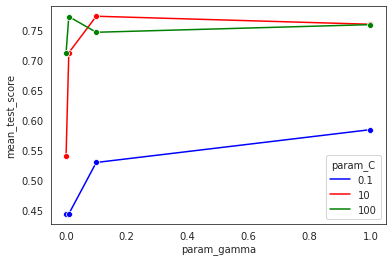

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

sns.lineplot('param_gamma', 'mean_test_score',hue='param_C', ci=None, marker='o',
             data=dat, palette=['blue', 'red', 'green'])

## **Kernel Poly**

In [14]:
kCV = 10
C = [0.1, 10, 100]
gamma = [1.0, 0.1, 0.01, 0.001]
kernel = ['poly']
 
estimator = svm.SVC()
gridsvmCV = GridSearchCV(estimator, cv=kCV, param_grid = dict(C = C, gamma=gamma, kernel = kernel), verbose=1,  n_jobs=-1)
best_model = gridsvmCV.fit(X_train, y_train)
gridsvmCV.cv_results_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.6s finished


{'mean_fit_time': array([0.23900077, 0.15349295, 0.15365505, 0.15517888, 0.26098762,
        0.22445555, 0.15288181, 0.15521555, 0.2626457 , 0.23809071,
        0.15545416, 0.1573034 ]),
 'mean_score_time': array([0.0137361 , 0.01365764, 0.01367133, 0.01402972, 0.01389601,
        0.01398787, 0.0143815 , 0.01526182, 0.01214027, 0.01448815,
        0.01505656, 0.01411157]),
 'mean_test_score': array([0.58587583, 0.44336659, 0.44336659, 0.44336659, 0.69059128,
        0.44336659, 0.44336659, 0.44336659, 0.68998152, 0.58587583,
        0.44336659, 0.44336659]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 10, 10, 10, 10, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1.0, 0.1, 0.01, 0.001, 1.0, 0.1, 0.01, 0.001, 1.0, 0.1,
                    0.01, 0.001],
              mask=[False, False, False, Fals

In [15]:
da = pd.DataFrame(gridsvmCV.cv_results_)
da

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.239001,0.008285,0.013736,0.001097,0.1,1,poly,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'poly'}",0.587879,0.575758,0.609756,0.609756,0.567073,0.536585,0.597561,0.603659,0.573171,0.597561,0.585876,0.021865,3
1,0.153493,0.003947,0.013658,0.000780,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,5
2,0.153655,0.003891,0.013671,0.000800,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,5
3,0.155179,0.004989,0.014030,0.001161,0.1,0.001,poly,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,5
4,0.260988,0.005156,0.013896,0.002472,10,1,poly,"{'C': 10, 'gamma': 1.0, 'kernel': 'poly'}",0.727273,0.703030,0.689024,0.731707,0.652439,0.621951,0.707317,0.695122,0.689024,0.689024,0.690591,0.031089,1
5,0.224456,0.005231,0.013988,0.000971,10,0.1,poly,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,5
6,0.152882,0.002937,0.014382,0.001104,10,0.01,poly,"{'C': 10, 'gamma': 0.01, 'kernel': 'poly'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,5
7,0.155216,0.004759,0.015262,0.002818,10,0.001,poly,"{'C': 10, 'gamma': 0.001, 'kernel': 'poly'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,5
8,0.262646,0.004080,0.012140,0.000455,100,1,poly,"{'C': 100, 'gamma': 1.0, 'kernel': 'poly'}",0.727273,0.703030,0.689024,0.731707,0.652439,0.621951,0.707317,0.695122,0.682927,0.689024,0.689982,0.031174,2
9,0.238091,0.007422,0.014488,0.001974,100,0.1,poly,"{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}",0.587879,0.575758,0.609756,0.609756,0.567073,0.536585,0.597561,0.603659,0.573171,0.597561,0.585876,0.021865,3


In [16]:
da[['param_C','param_gamma', 'mean_test_score']]

,param_C,param_gamma,mean_test_score
0,0.1,1,0.585876
1,0.1,0.1,0.443367
2,0.1,0.01,0.443367
3,0.1,0.001,0.443367
4,10,1,0.690591
5,10,0.1,0.443367
6,10,0.01,0.443367
7,10,0.001,0.443367
8,100,1,0.689982
9,100,0.1,0.585876


In [17]:
gridsvmCV.best_params_

{'C': 10, 'gamma': 1.0, 'kernel': 'poly'}

In [18]:
gridsvmCV.best_score_

0.6905912786400592

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


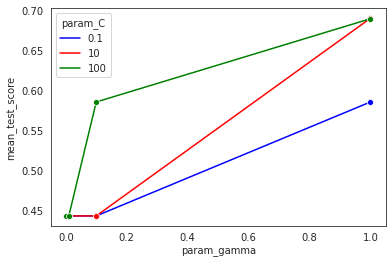

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

sns.lineplot('param_gamma', 'mean_test_score',hue='param_C', ci=None, marker='o',
             data=da, palette=['blue', 'red', 'green'])

## **Kernel Linear**

In [20]:
kCV = 10
C = [0.1, 10, 100]
gamma = [1.0, 0.1, 0.01, 0.001]
kernel = ['linear']
 
estimator = svm.SVC()
gridsvmCV = GridSearchCV(estimator, cv=kCV, param_grid = dict(C = C, gamma=gamma, kernel = kernel), verbose=1,  n_jobs=-1)
best_model = gridsvmCV.fit(X_train, y_train)
gridsvmCV.cv_results_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.7s finished


{'mean_fit_time': array([0.1547677 , 0.15025332, 0.14868882, 0.14952571, 0.16896288,
        0.1742486 , 0.17404554, 0.17477238, 0.27678201, 0.27550869,
        0.27466865, 0.26613038]),
 'mean_score_time': array([0.01170015, 0.01203575, 0.0116993 , 0.01122439, 0.00916729,
        0.00858972, 0.00812769, 0.00859525, 0.00745091, 0.00743384,
        0.00785024, 0.00743372]),
 'mean_test_score': array([0.62850333, 0.62850333, 0.62850333, 0.62850333, 0.75031412,
        0.75031412, 0.75031412, 0.75031412, 0.73263119, 0.73263119,
        0.73263119, 0.73263119]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 10, 10, 10, 10, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1.0, 0.1, 0.01, 0.001, 1.0, 0.1, 0.01, 0.001, 1.0, 0.1,
                    0.01, 0.001],
              mask=[False, False, False, Fals

In [21]:
db = pd.DataFrame(gridsvmCV.cv_results_)
db

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154768,0.007955,0.011700,0.001176,0.1,1,linear,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'linear'}",0.624242,0.630303,0.658537,0.652439,0.615854,0.597561,0.628049,0.652439,0.615854,0.609756,0.628503,0.019231,9
1,0.150253,0.004545,0.012036,0.001299,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.624242,0.630303,0.658537,0.652439,0.615854,0.597561,0.628049,0.652439,0.615854,0.609756,0.628503,0.019231,9
2,0.148689,0.004397,0.011699,0.001470,0.1,0.01,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.624242,0.630303,0.658537,0.652439,0.615854,0.597561,0.628049,0.652439,0.615854,0.609756,0.628503,0.019231,9
3,0.149526,0.006388,0.011224,0.000548,0.1,0.001,linear,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",0.624242,0.630303,0.658537,0.652439,0.615854,0.597561,0.628049,0.652439,0.615854,0.609756,0.628503,0.019231,9
4,0.168963,0.007676,0.009167,0.003111,10,1,linear,"{'C': 10, 'gamma': 1.0, 'kernel': 'linear'}",0.793939,0.690909,0.737805,0.768293,0.731707,0.750000,0.768293,0.731707,0.750000,0.780488,0.750314,0.027997,1
5,0.174249,0.009316,0.008590,0.000737,10,0.1,linear,"{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}",0.793939,0.690909,0.737805,0.768293,0.731707,0.750000,0.768293,0.731707,0.750000,0.780488,0.750314,0.027997,1
6,0.174046,0.011302,0.008128,0.000384,10,0.01,linear,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}",0.793939,0.690909,0.737805,0.768293,0.731707,0.750000,0.768293,0.731707,0.750000,0.780488,0.750314,0.027997,1
7,0.174772,0.011716,0.008595,0.000586,10,0.001,linear,"{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}",0.793939,0.690909,0.737805,0.768293,0.731707,0.750000,0.768293,0.731707,0.750000,0.780488,0.750314,0.027997,1
8,0.276782,0.093593,0.007451,0.000361,100,1,linear,"{'C': 100, 'gamma': 1.0, 'kernel': 'linear'}",0.787879,0.696970,0.737805,0.768293,0.719512,0.750000,0.737805,0.689024,0.689024,0.750000,0.732631,0.031981,5
9,0.275509,0.094010,0.007434,0.000421,100,0.1,linear,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}",0.787879,0.696970,0.737805,0.768293,0.719512,0.750000,0.737805,0.689024,0.689024,0.750000,0.732631,0.031981,5


In [22]:
db[['param_C','param_gamma', 'mean_test_score']]

,param_C,param_gamma,mean_test_score
0,0.1,1,0.628503
1,0.1,0.1,0.628503
2,0.1,0.01,0.628503
3,0.1,0.001,0.628503
4,10,1,0.750314
5,10,0.1,0.750314
6,10,0.01,0.750314
7,10,0.001,0.750314
8,100,1,0.732631
9,100,0.1,0.732631


In [23]:
gridsvmCV.best_params_

{'C': 10, 'gamma': 1.0, 'kernel': 'linear'}

In [24]:
gridsvmCV.best_score_

0.7503141167775313

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


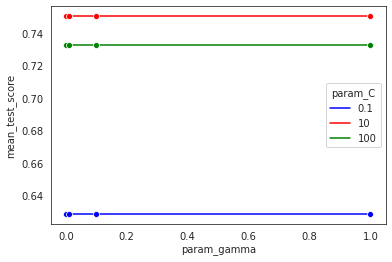

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

sns.lineplot('param_gamma', 'mean_test_score',hue='param_C', ci=None, marker='o',
             data=db, palette=['blue', 'red', 'green'])

## **Kernel Sigmoid**

In [26]:
kCV = 10
C = [0.1, 10, 100]
gamma = [1.0, 0.1, 0.01, 0.001]
kernel = ['sigmoid']
 
estimator = svm.SVC()
gridsvmCV = GridSearchCV(estimator, cv=kCV, param_grid = dict(C = C, gamma=gamma, kernel = kernel), verbose=1,  n_jobs=-1)
best_model = gridsvmCV.fit(X_train, y_train)
gridsvmCV.cv_results_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.6s finished


{'mean_fit_time': array([0.1708333 , 0.18160064, 0.16984272, 0.15716343, 0.13753166,
        0.15358071, 0.16947217, 0.17859731, 0.1291249 , 0.18078454,
        0.15021474, 0.15635071]),
 'mean_score_time': array([0.01413102, 0.01418836, 0.01399934, 0.01634274, 0.00806134,
        0.01075222, 0.01272242, 0.01431684, 0.00718424, 0.00967407,
        0.01129858, 0.0120652 ]),
 'mean_test_score': array([0.62301922, 0.44336659, 0.44336659, 0.44336659, 0.71739837,
        0.77769032, 0.62850333, 0.44336659, 0.68998891, 0.75031412,
        0.77830007, 0.62850333]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 10, 10, 10, 10, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1.0, 0.1, 0.01, 0.001, 1.0, 0.1, 0.01, 0.001, 1.0, 0.1,
                    0.01, 0.001],
              mask=[False, False, False, Fals

In [27]:
dc = pd.DataFrame(gridsvmCV.cv_results_)
dc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.170833,0.005591,0.014131,0.001256,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1.0, 'kernel': 'sigmoid'}",0.630303,0.618182,0.634146,0.658537,0.609756,0.585366,0.628049,0.646341,0.609756,0.609756,0.623019,0.019941,8
1,0.181601,0.006741,0.014188,0.000356,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,9
2,0.169843,0.004142,0.013999,0.000389,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,9
3,0.157163,0.004138,0.016343,0.004808,0.1,0.001,sigmoid,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,9
4,0.137532,0.012125,0.008061,0.000282,10,1,sigmoid,"{'C': 10, 'gamma': 1.0, 'kernel': 'sigmoid'}",0.769697,0.696970,0.725610,0.725610,0.695122,0.676829,0.750000,0.689024,0.750000,0.695122,0.717398,0.029760,4
5,0.153581,0.007842,0.010752,0.000325,10,0.1,sigmoid,"{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.842424,0.745455,0.756098,0.817073,0.731707,0.743902,0.823171,0.768293,0.762195,0.786585,0.777690,0.036026,2
6,0.169472,0.004074,0.012722,0.000458,10,0.01,sigmoid,"{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.624242,0.630303,0.658537,0.652439,0.615854,0.597561,0.628049,0.652439,0.615854,0.609756,0.628503,0.019231,6
7,0.178597,0.003457,0.014317,0.000191,10,0.001,sigmoid,"{'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.436364,0.442424,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.445122,0.439024,0.443367,0.003006,9
8,0.129125,0.014447,0.007184,0.000525,100,1,sigmoid,"{'C': 100, 'gamma': 1.0, 'kernel': 'sigmoid'}",0.739394,0.678788,0.719512,0.719512,0.640244,0.652439,0.719512,0.682927,0.707317,0.640244,0.689989,0.034483,5
9,0.180785,0.022674,0.009674,0.000428,100,0.1,sigmoid,"{'C': 100, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.793939,0.690909,0.731707,0.768293,0.737805,0.750000,0.768293,0.731707,0.750000,0.780488,0.750314,0.027997,3


In [28]:
dc[['param_C','param_gamma', 'mean_test_score']]

,param_C,param_gamma,mean_test_score
0,0.1,1,0.623019
1,0.1,0.1,0.443367
2,0.1,0.01,0.443367
3,0.1,0.001,0.443367
4,10,1,0.717398
5,10,0.1,0.777690
6,10,0.01,0.628503
7,10,0.001,0.443367
8,100,1,0.689989
9,100,0.1,0.750314


In [29]:
gridsvmCV.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [30]:
gridsvmCV.best_score_

0.77830007390983

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


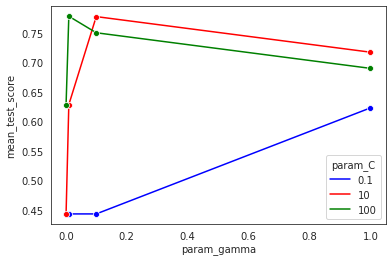

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

sns.lineplot('param_gamma', 'mean_test_score',hue='param_C', ci=None, marker='o',
             data=dc, palette=['blue', 'red', 'green'])

In [32]:
kCV = 10
C = [100]
gamma = [0.01]
kernel = ['sigmoid']
 
estimator = svm.SVC()
gridsvmCV = GridSearchCV(estimator, cv=kCV, param_grid = dict(C = C, gamma=gamma, kernel = kernel), verbose=1,  n_jobs=-1)
best_model = gridsvmCV.fit(X_train, y_train)
y_SVM = best_model.predict(X_test)
#print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[[118   4   1  18]
 [ 11  42   3   8]
 [  2   0  14   5]
 [ 16   9   1 155]]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


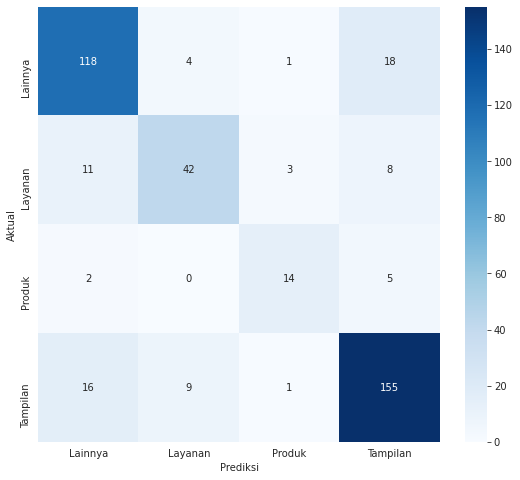

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_SVM)
index = ['Lainnya', 'Layanan', 'Produk', 'Tampilan']
columns = ['Lainnya', 'Layanan', 'Produk', 'Tampilan']
cm_df = pd.DataFrame(cm,columns, index)                      

fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt=".0f", ax = ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()